# Decision Tree and Random Forest

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## 1) Preprocess the data
Load the Income dataset from the page of the course (train.csv).

Search for missing values and if needed, handle them!

Drop the finalweight (fnlwgt) and Educational_num columns!

Encode the non numeric variables into numeric ones! For the binary features simply encode them as (0/1). Do not create two separate columns for them!

Make some exploration of the categorical columns, plot the frequencies of each categories. Based on the finding, drop all entries that are outside the US.

In [27]:
train = pd.read_csv("data/train.csv")
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [28]:
train.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

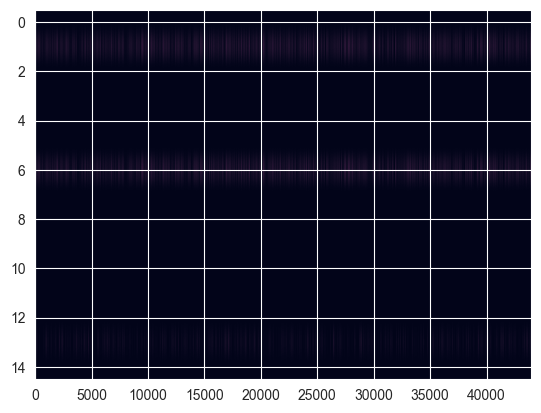

In [29]:
plt.imshow(train.isna().T, aspect='auto')

In [30]:
train = train[train['workclass'].notna()]
train = train[train['occupation'].notna()]
train = train[train['native-country'].notna()]
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [31]:
train = train.drop(columns=["fnlwgt","educational-num"])
train

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,12th,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,Some-college,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,Some-college,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,Bachelors,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [32]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = train.select_dtypes(include=numerics)
nonnumeric_columns = [x for x in train.columns if x not in newdf.columns]
nonnumeric_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

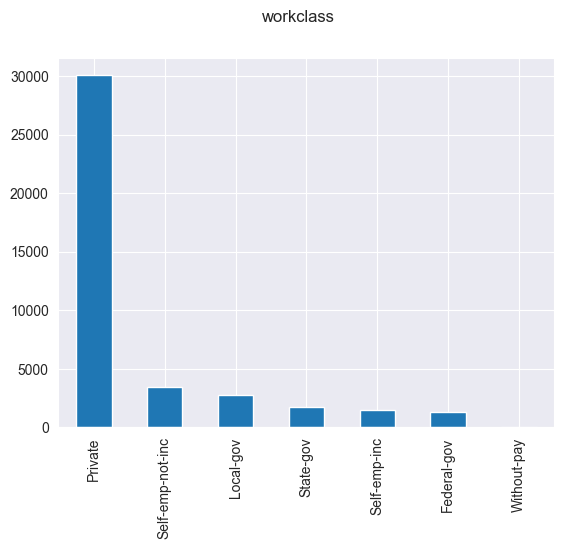

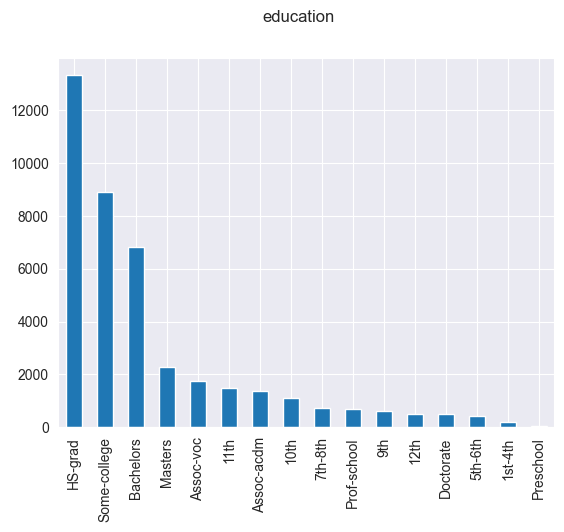

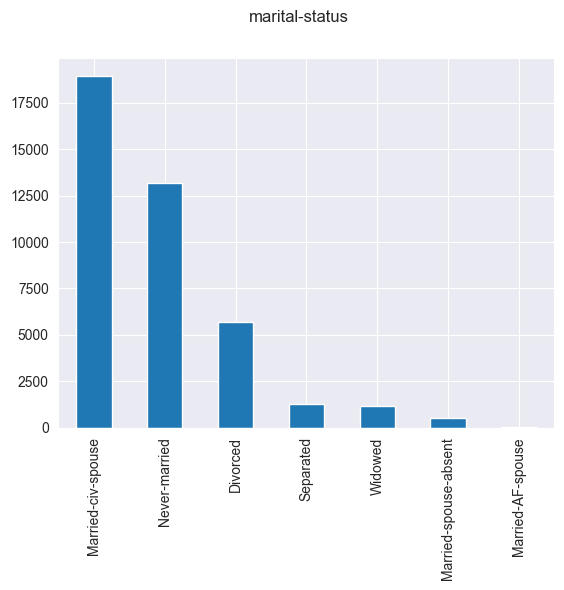

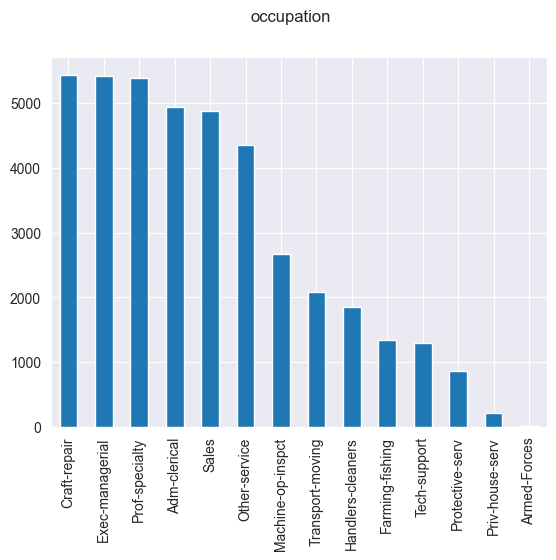

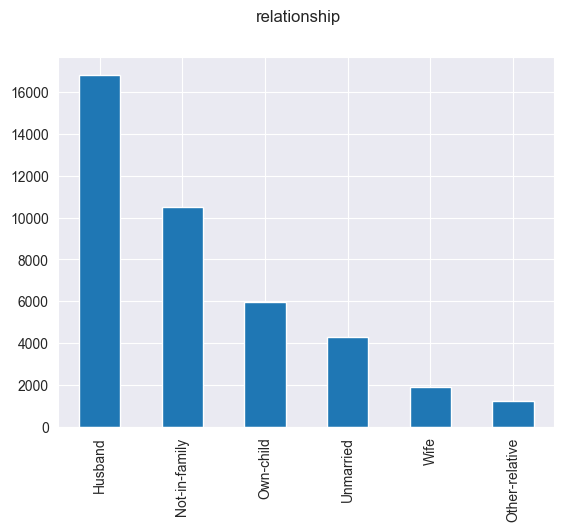

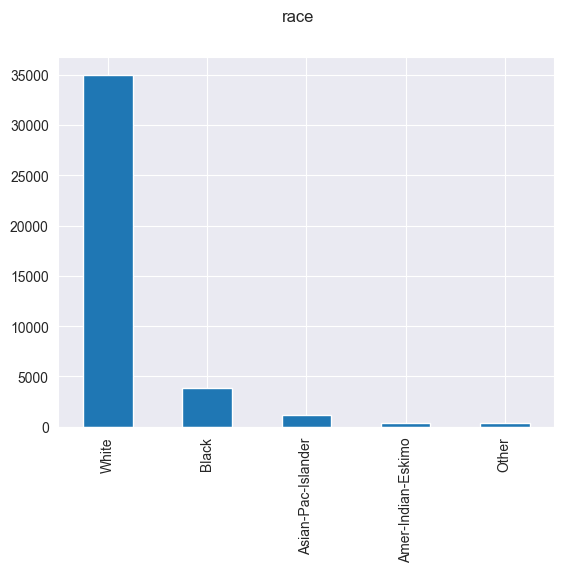

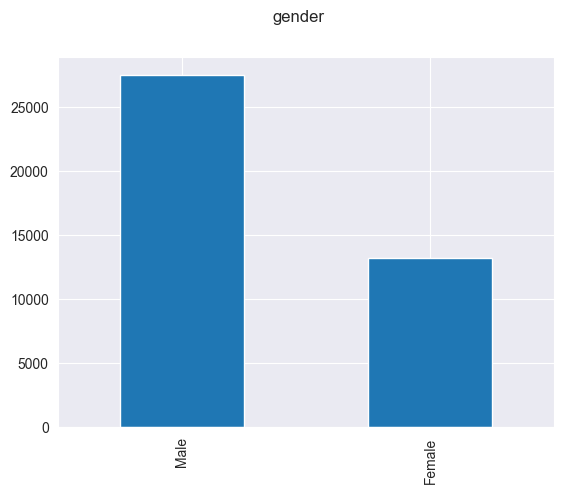

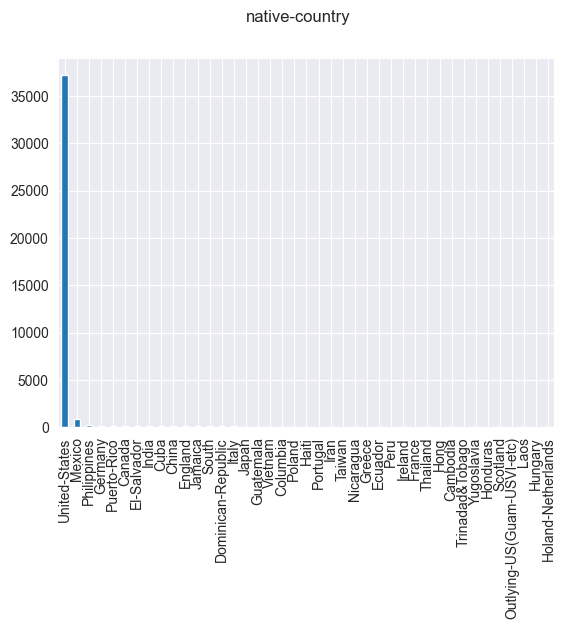

In [38]:
for col in nonnumeric_columns:
    fig, ax = plt.subplots()
    train[col].value_counts().plot(ax=ax, kind='bar')
    fig.suptitle(col)
    plt.show()

In [40]:
code_dict = {}

# col_names = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
for col_name in nonnumeric_columns:
  code_dict.update({col_name : {'value' : [], 'code' :[]}})
  for code, val in enumerate(train[col_name].unique()):
    train[col_name].replace(val, code, inplace=True)
    code_dict[col_name]['value'].append(val)
    code_dict[col_name]['code'].append(code)

for col_name, values in code_dict.items():
  print(col_name, '\t{}'.format(values))

workclass 	{'value': ['Private', 'State-gov', 'Self-emp-not-inc', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay'], 'code': [0, 1, 2, 3, 4, 5, 6]}
education 	{'value': ['Doctorate', '12th', 'Bachelors', '7th-8th', 'Some-college', 'HS-grad', '9th', '10th', '11th', 'Masters', 'Preschool', '5th-6th', 'Prof-school', 'Assoc-voc', 'Assoc-acdm', '1st-4th'], 'code': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
marital-status 	{'value': ['Divorced', 'Never-married', 'Married-civ-spouse', 'Widowed', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse'], 'code': [0, 1, 2, 3, 4, 5, 6]}
occupation 	{'value': ['Exec-managerial', 'Other-service', 'Transport-moving', 'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', 'Craft-repair', 'Tech-support', 'Priv-house-serv', 'Armed-Forces'], 'code': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}
relationship 	{'value': ['Not-in-family', 'Own-child', 'Husband', '

In [41]:
train[nonnumeric_columns] = train[nonnumeric_columns].astype('category')
train.dtypes

age                  int64
workclass         category
education         category
marital-status    category
occupation        category
relationship      category
race              category
gender            category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income_>50K          int64
dtype: object

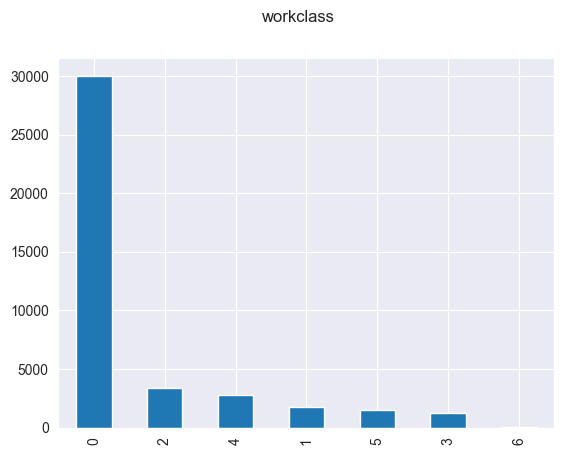

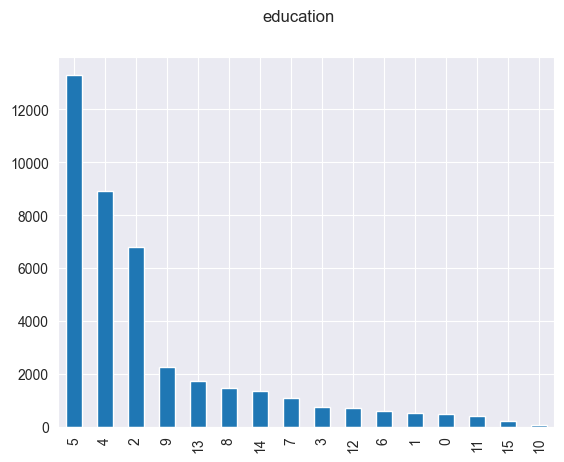

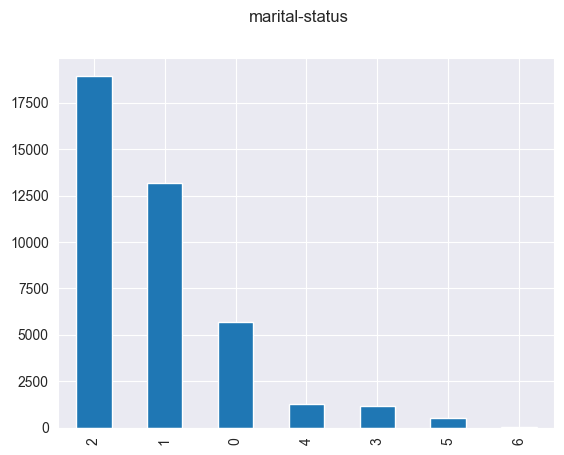

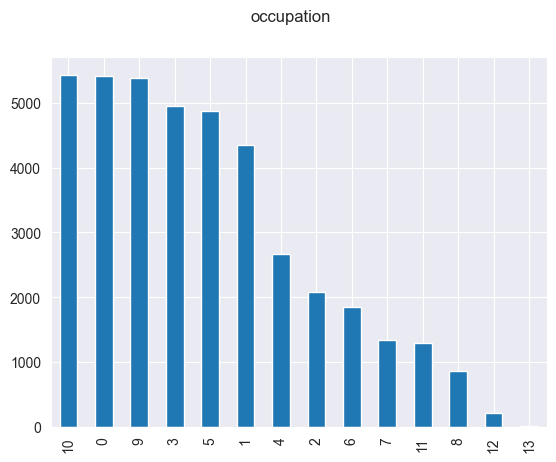

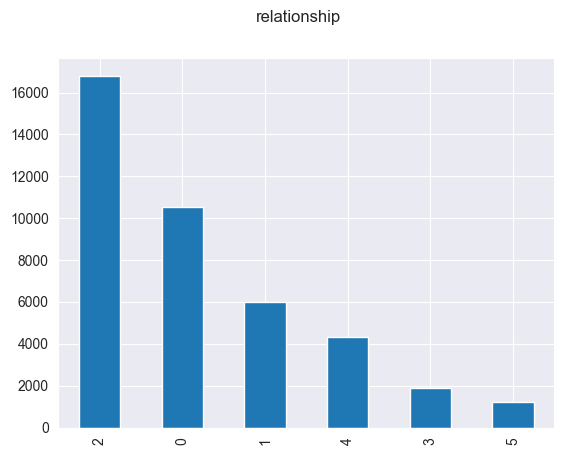

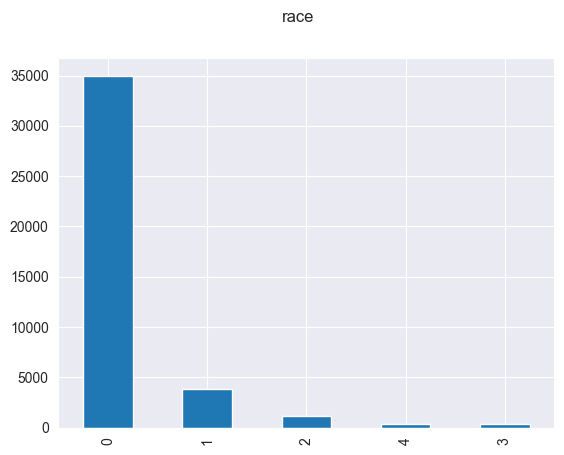

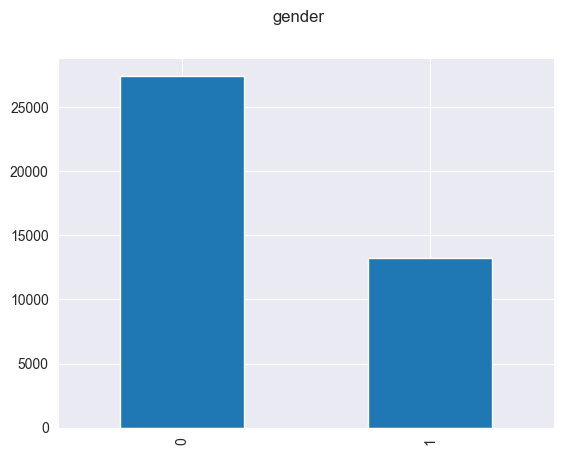

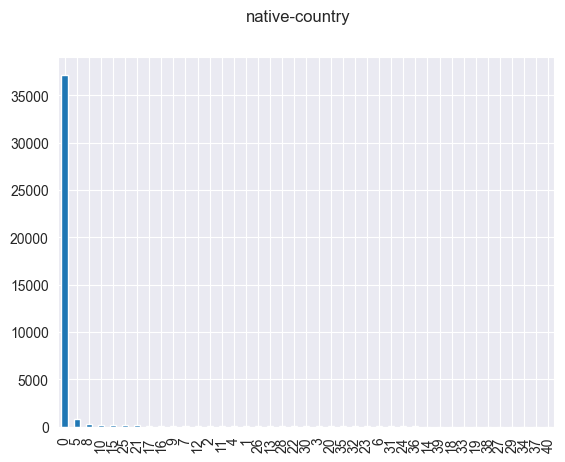

In [42]:
for col in nonnumeric_columns:
    fig, ax = plt.subplots()
    train[col].value_counts().plot(ax=ax, kind='bar')
    fig.suptitle(col)
    plt.show()

These categories about personal data of a group of people that may predict their income.We should only keep the meaningful columns, so we drop the natonality that is not from US.

In [43]:
train = train[train["native-country"] == 0]
train

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,0,0,0,0,0,0,0,99999,0,60,0,1
1,17,0,1,1,1,1,0,0,0,0,15,0,0
2,31,0,2,2,0,2,0,0,0,0,40,0,1
3,58,1,3,2,2,2,0,0,0,0,40,0,0
4,25,1,4,1,1,0,1,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,0,2,2,0,2,0,0,0,0,50,0,1
43953,19,0,5,1,1,1,0,1,0,0,40,0,0
43954,30,0,4,0,5,0,0,0,0,0,58,0,0
43955,46,0,2,1,5,0,0,1,0,0,35,0,0


## 2) Train & visualize a decision tree classifier
Train a decision tree classifier using the sklearn API.

Use its default parameters and use all the data.

Visualize the decision tree, with the Gini impurities also showing on the plot. The plot_tree function in sklearn will be really helpful. You may or may not need to tune its arguments to get a reasonable result.

Manually check for two cases if the returned Gini impurities are correct.

In a few sentences, discuss the results.

In [45]:
# Split data into features (X) and target (y)
y = train.pop('income_>50K')
X = train

In [46]:
# Create decisiontreeclassifier object
decisiontreeclassifier = DecisionTreeClassifier(max_depth=4)

# Train it with all data
decisiontreeclassifier.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [47]:
 # Visualize decision tree with Gini impurities
plt.figure(figsize=(200, 50))
#plt.figure(figsize=(20, 50))
plot_tree(decisiontreeclassifier, feature_names=X.columns, filled=True, class_names=['0', '1'], fontsize=20)

[Text(0.5, 0.9, 'marital-status <= 1.5\ngini = 0.378\nsamples = 37168\nvalue = [27745, 9423]\nclass = 0'),
 Text(0.25, 0.7, 'capital-gain <= 7055.5\ngini = 0.124\nsamples = 17376\nvalue = [16222, 1154]\nclass = 0'),
 Text(0.125, 0.5, 'hours-per-week <= 42.5\ngini = 0.093\nsamples = 17048\nvalue = [16215, 833]\nclass = 0'),
 Text(0.0625, 0.3, 'capital-loss <= 2218.5\ngini = 0.049\nsamples = 13402\nvalue = [13064, 338]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.045\nsamples = 13353\nvalue = [13042, 311]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.495\nsamples = 49\nvalue = [22, 27]\nclass = 1'),
 Text(0.1875, 0.3, 'age <= 30.5\ngini = 0.235\nsamples = 3646\nvalue = [3151, 495]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.087\nsamples = 1379\nvalue = [1316, 63]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.308\nsamples = 2267\nvalue = [1835, 432]\nclass = 0'),
 Text(0.375, 0.5, 'capital-gain <= 8296.0\ngini = 0.042\nsamples = 328\nvalue = [7, 321]\nclass = 1'),
 Text(0.3125, 0.3, 'capital-g

In [80]:
# 0 y class
print('Income >= 50k: ', train[y == 1].shape[0])

# 1 y class
print('Income < 50k:', train[y==0].shape[0])

Income >= 50k:  9423
Income < 50k: 27745


In [77]:
y_manual_true = [index for index, value in enumerate(y) if value ==1 ]
y_manual_false = [index for index, value in enumerate(y) if value ==0 ]

In [78]:
train.iloc[y_manual_true[0]]

age                  67
workclass             0
education             0
marital-status        0
occupation            0
relationship          0
race                  0
gender                0
capital-gain      99999
capital-loss          0
hours-per-week       60
native-country        0
Name: 0, dtype: int64

In [79]:
train.iloc[y_manual_false[0]]

age               17
workclass          0
education          1
marital-status     1
occupation         1
relationship       1
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week    15
native-country     0
Name: 1, dtype: int64

I think these result should be valid ,because young man is only works 15 hours per week should earn less than a 67 years old man who is working 60 hours per a week.
The capital-gain tells us about people whose got company.

## 3) Random forest feature importance vs Lasso features
Train a random forest classifier on all the data using the sklearn API.

Use default values again, but fix the random_state to 137!

Plot the importance values of the most important features.

Create a bar plot where the height of the bar is the feature importance.

The feature_importances_ attribute is helpful.

Fit a Lasso regression with a hand tuned hyperparameter to end up with only approx. 10 non-zero coefficients (or use the same approach as before). What are the important columns here? Compare them with the ones you got before.

In [82]:
# Create RandomForestClassifier object
randomforestclassifier = RandomForestClassifier(random_state=137)

# Fit it to data
randomforestclassifier.fit(X, y)

RandomForestClassifier(random_state=137)

In [84]:
# Find the first 10 important features based on RandomForestClassifier
feature_imp_df = pd.Series(data=randomforestclassifier.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp_df

age               0.230073
capital-gain      0.134335
marital-status    0.120354
hours-per-week    0.117575
education         0.106330
occupation        0.095847
relationship      0.072890
capital-loss      0.046178
workclass         0.043923
gender            0.016637
race              0.015857
native-country    0.000000
dtype: float64

TypeError: 'str' object is not callable

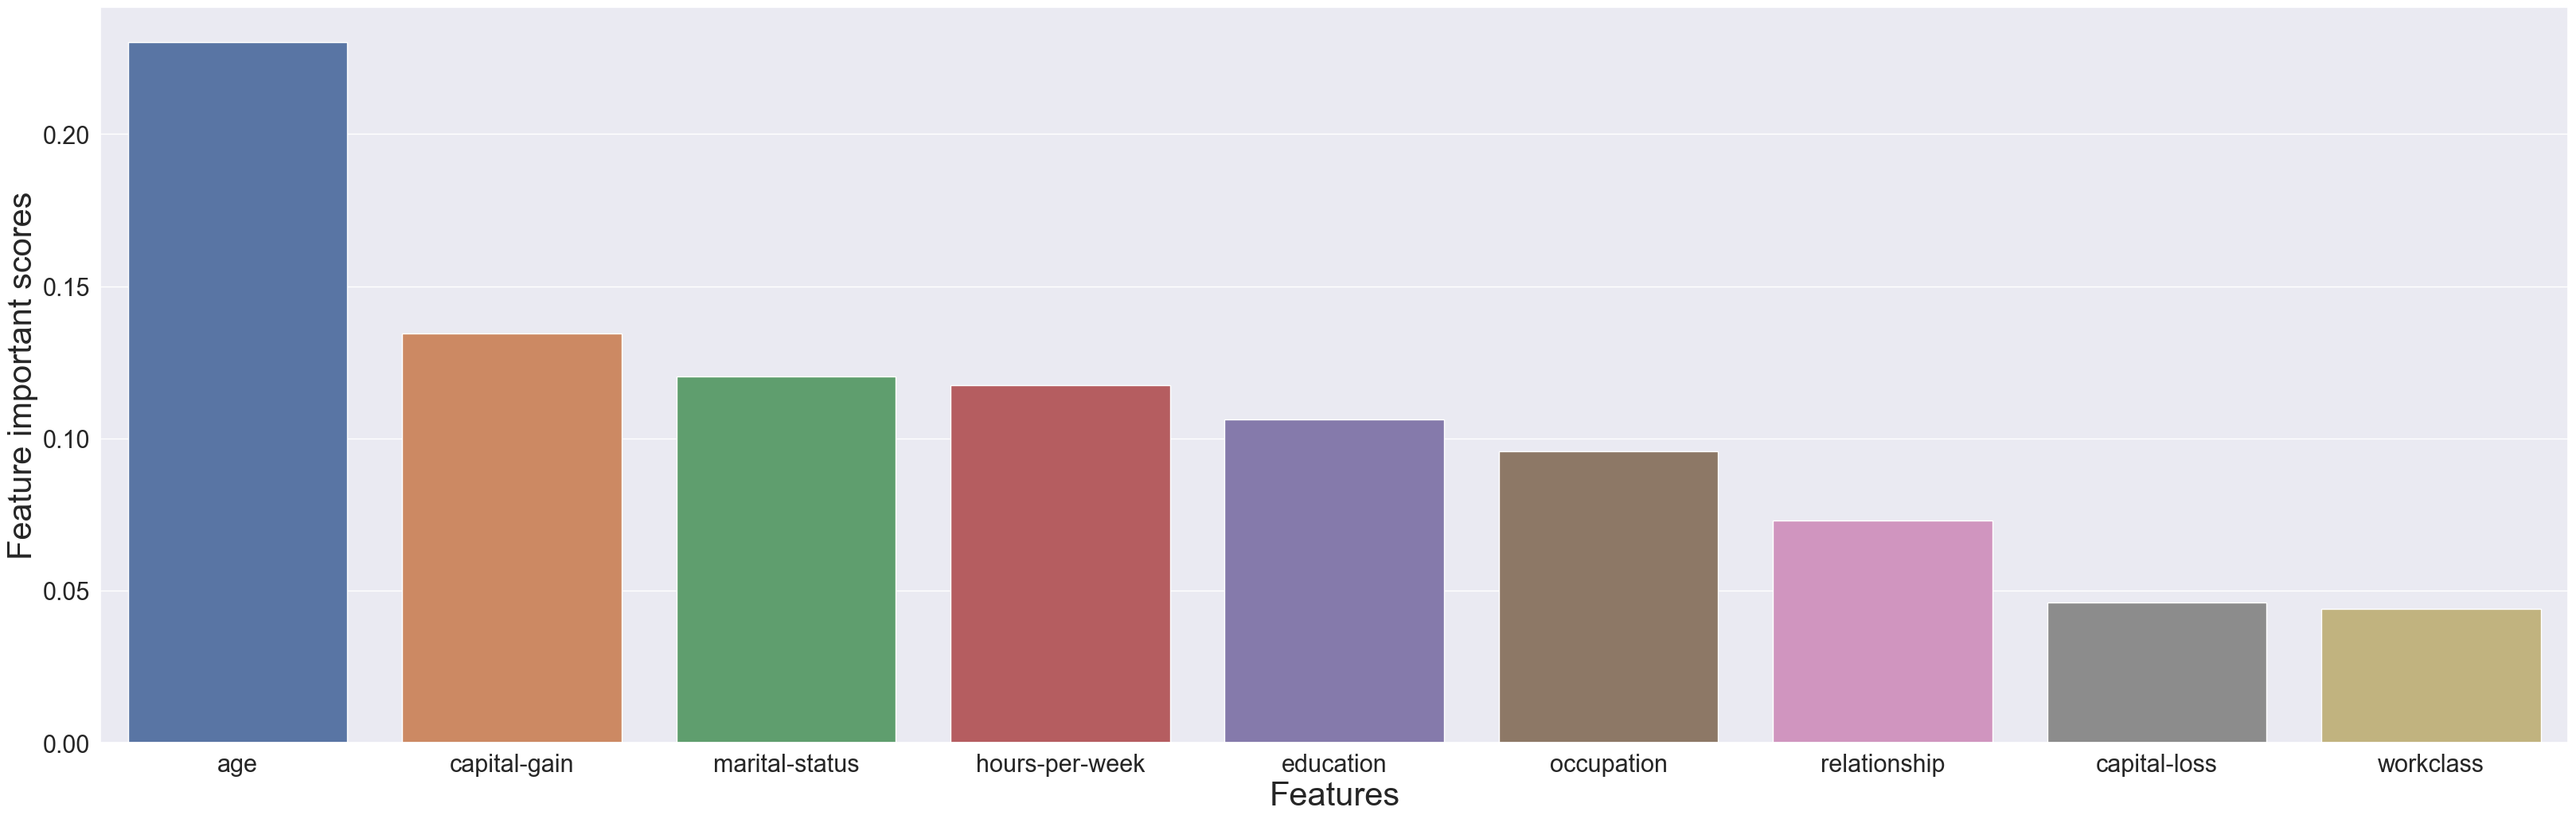

In [89]:
plt.figure(figsize=(40, 12))
sns.set(font_scale=2)
sns.barplot(x=feature_imp_df[:9].index, y=feature_imp_df[:9])
plt.xlabel('Features', fontsize=30)
plt.ylabel('Feature important scores', fontsize=30)
plt.title('First Nine important features', fontsize=40)
plt.show()

In [130]:
# 5-fold search is needed
folds = 5
cv = KFold(n_splits=folds, shuffle=True, random_state=42)
# Lasso estimator
model = Lasso(random_state=None)
# Paramters to explored:
# alpha, normalize, max_iter
param_grid = {
    'alpha' : np.logspace(-10, 1, 100),
    'normalize' : [True, False],
    'max_iter' : [500, 600, 700, 800, 900, 1000, 1100, 1200]
}
# # Grid search cross-validation
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1)

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-10, 1.29154967e-10, 1.66810054e-10, 2.15443469e-10,
       2.78255940e-10, 3.59381366e-10, 4.64158883e-10, 5.99484250e-10,
       7.74263683e-10, 1.00000000e-09, 1.29154967e-09, 1.66810054e-09,
       2.15443469e-09, 2.78255940e-09, 3.59381366e-09, 4.64158...
       7.74263683e-02, 1.00000000e-01, 1.29154967e-01, 1.66810054e-01,
       2.15443469e-01, 2.78255940e-01, 3.59381366e-01, 4.64158883e-01,
       5.99484250e-01, 7.74263683e-01, 1.00000000e+00, 1.29154967e+00,
       1.66810054e+00, 2.15443469e+00, 2.78255940e+00, 3.59381366e+00,
       4.64158883e+00, 5.99484250e+00, 7.74263683e+00, 1.00000000e+01]),
                         'max_iter': [500, 600, 700, 800, 900, 1000, 1100,
                                      1200],
                         'normalize': [True, False]})

In [137]:
best_model = clf.best_estimator_
best_model.fit(X, y)

In [139]:
best_model.coef_

array([ 4.60647997e-03,  1.67899617e-02, -6.78958226e-04,  5.53025036e-02,
       -3.66548461e-04,  2.62611858e-02, -4.26295892e-02, -1.26796352e-01,
        1.04483408e-05,  1.28055418e-04,  5.10982123e-03,  0.00000000e+00])

In [140]:
lasso_feature_df = pd.Series(data=best_model.coef_, index=X.columns).sort_values(ascending=False)
lasso_feature_df

marital-status    0.055303
relationship      0.026261
workclass         0.016790
hours-per-week    0.005110
age               0.004606
capital-loss      0.000128
capital-gain      0.000010
native-country    0.000000
occupation       -0.000367
education        -0.000679
race             -0.042630
gender           -0.126796
dtype: float64

TypeError: 'str' object is not callable

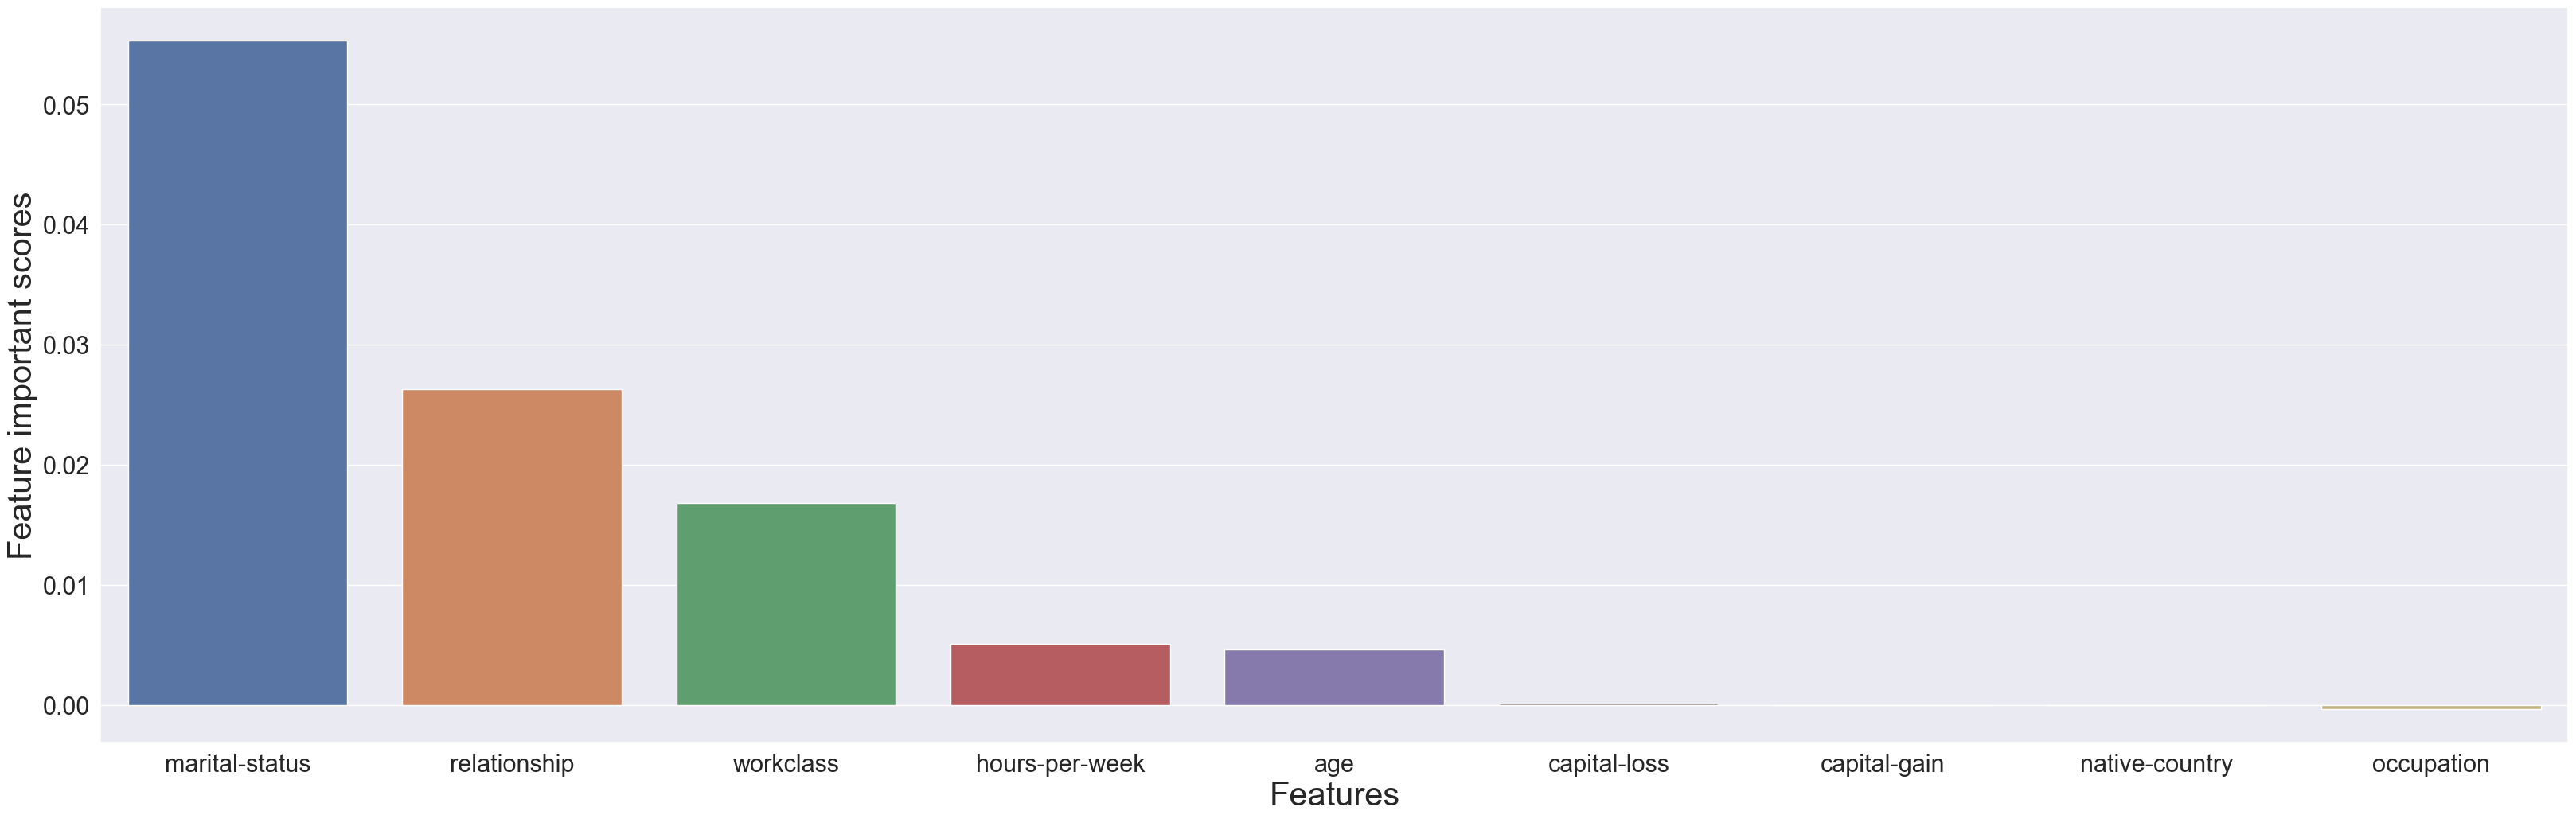

In [141]:
plt.figure(figsize=(40, 12))
sns.set(font_scale=2)
sns.barplot(x=lasso_feature_df[:9].index, y=lasso_feature_df[:9])
plt.xlabel('Features', fontsize=30)
plt.ylabel('Feature important scores', fontsize=30)
plt.title('First Nine important features', fontsize=40)
plt.show()

Here the most important columns are marital-status, relationship and workclass.
The difference is mainly that Age in the random forest is the most important column, but in the first 5 column is almost same and we can see that may be the intersection of them would be the answer of importance of the columns.

## 4) Evaluation
Generate prediction probabilities with a decision tree and with a random forest model:

Use 5-fold cross validation for both models.
Use default parameters for both models.
Compare the two models with ROC curves.

Why does the shape of the decision tree's ROC curve looks different?

In [90]:
# 5-fold cross validation
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
cv.get_n_splits(X, y)

5

Train: [    1     2     4 ... 37165 37166 37167] 	Test: [    0     3     5 ... 37145 37158 37163]
Train: [    0     1     2 ... 37164 37166 37167] 	Test: [    6    12    29 ... 37157 37160 37165]
Train: [    0     1     2 ... 37165 37166 37167] 	Test: [    4     7     9 ... 37154 37156 37159]
Train: [    0     3     4 ... 37163 37165 37167] 	Test: [    1     2    18 ... 37162 37164 37166]
Train: [    0     1     2 ... 37164 37165 37166] 	Test: [   10    11    14 ... 37152 37155 37167]


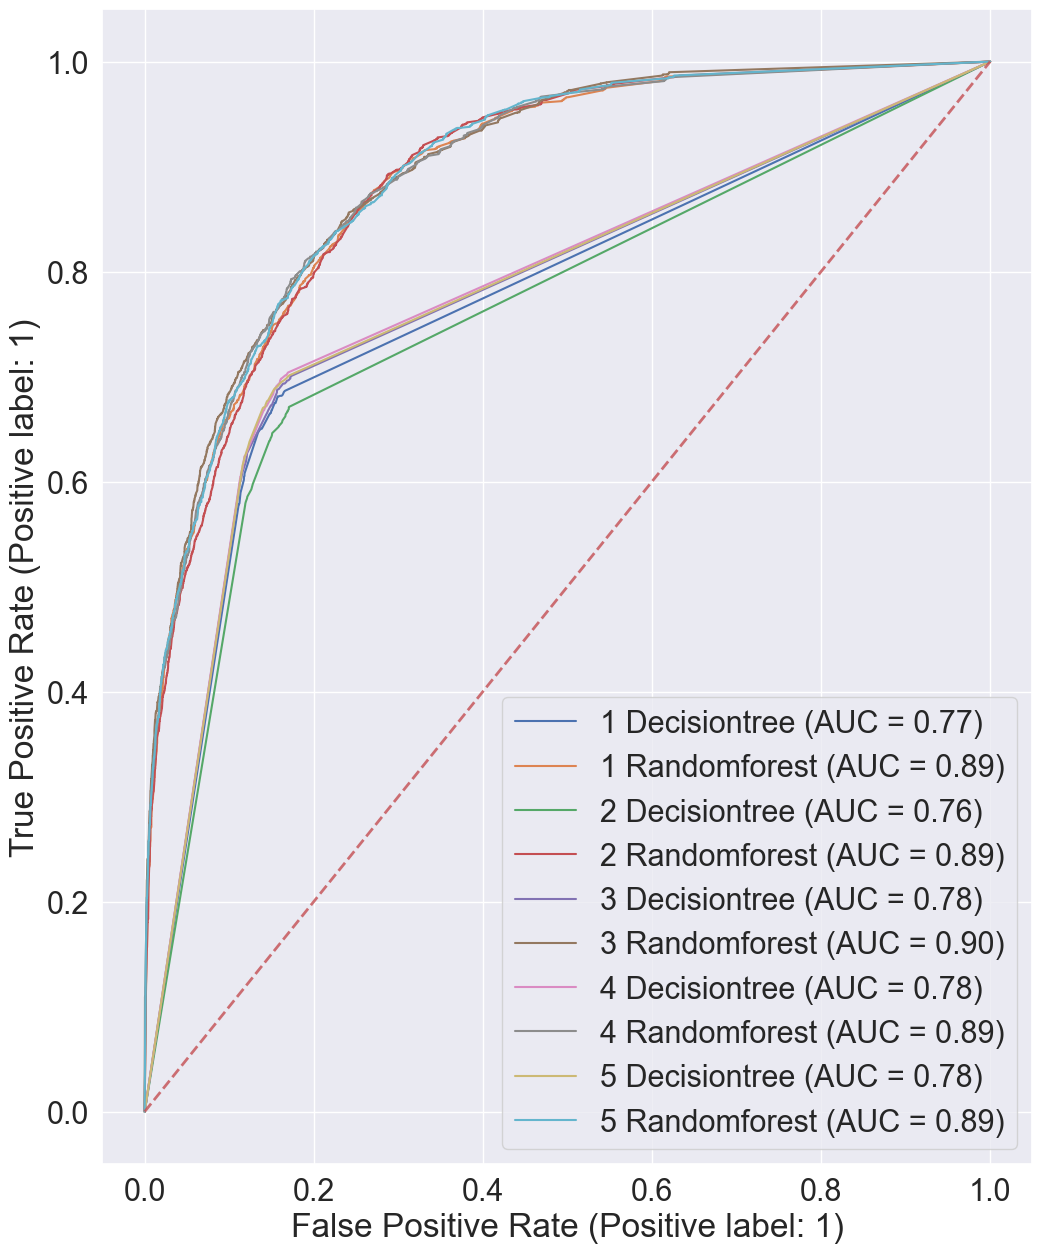

In [105]:
# Prepare models
dtclf = DecisionTreeClassifier()
rfclf = RandomForestClassifier()

# Create figure
fig, ax = plt.subplots(figsize=(12, 15))

# Apply cross validation
for id, (train_i, test_i) in enumerate(cv.split(X, y)):
    print('Train: {}'.format(train_i), '\tTest: {}'.format(test_i))
    X_train, X_test = X.iloc[train_i, :], X.iloc[test_i, :]
    y_train, y_test = y.iloc[train_i], y.iloc[test_i]

    # Fit the models
    dtclf.fit(X_train, y_train)
    rfclf.fit(X_train, y_train)

    # Predict with models
    y_pred_dtclf = dtclf.predict_proba(X_test)
    y_pred_rfclf = rfclf.predict_proba(X_test)

    # Display ROC curves
    RocCurveDisplay.from_predictions(y_test, y_pred_dtclf[:, 1], ax=ax, name='{} Decisiontree'.format(id +1))
    RocCurveDisplay.from_predictions(y_test, y_pred_rfclf[:, 1], ax=ax, name='{} Randomforest'.format(id +1))


ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

Why does the shape of the decision tree's ROC curve looks different?
Because the random forest is collection of Decision trees, that's why it's not as sensitive to the dataset.

## 5) Model tuning
Using 70% - 30% train-test split generate predictions for a random forest model.
Set the random_state parameter for every run to for the train-test split and for the Random Forest Classifier as well!
Plot the AUC as the function of the number of trees in the forest for both the traing and the test data!
Do we experience overfitting if we use too many trees?

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=137)
print('X train: {}\tX test: {}'.format(X_train.shape[0], X_test.shape[0]))
print('y train: {}\ty test: {}'.format(y_train.shape[0], y_test.shape[0]))

X train: 26017	X test: 11151
y train: 26017	y test: 11151


C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sk

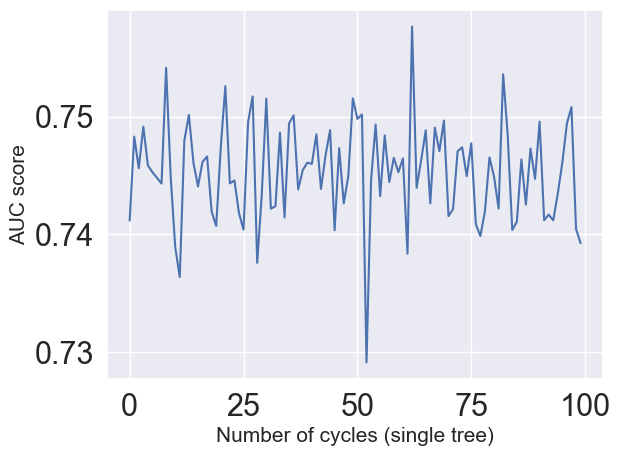

In [108]:
# Create RandomForestClassifier object
rfclf = RandomForestClassifier(random_state=137)

# Fit it to training data
rfclf.fit(X_train, y_train)

aucs_list = [roc_auc_score(tree.predict(X_test) , y_test) for tree in rfclf.estimators_]

# Plot auc
plt.figure()
# plt.title('AUC curve of all trees in Randomforest', fontsize=20)
plt.xlabel('Number of cycles (single tree)', fontsize=15)
plt.ylabel('AUC score', fontsize=15)
plt.plot(range(len(rfclf.estimators_)), aucs_list)

In [145]:
auc_scores_list = []


# Create RandomForestClassifier object with increasing number of trees
for tree_numb in range(8000,  100 , -800):
  print('Tree number: {}'.format(tree_numb))
  rfclf = RandomForestClassifier(n_estimators=tree_numb, random_state=137)
  # Fit it to training data
  rfclf.fit(X_train, y_train)

  # Predict y from test set
  y_pred = rfclf.predict(X_test)

  # Add auc score to the list
  auc_scores_list.append(roc_auc_score(y_test, y_pred))



Tree number: 8000
Tree number: 7200
Tree number: 6400
Tree number: 5600
Tree number: 4800
Tree number: 4000
Tree number: 3200
Tree number: 2400
Tree number: 1600
Tree number: 800


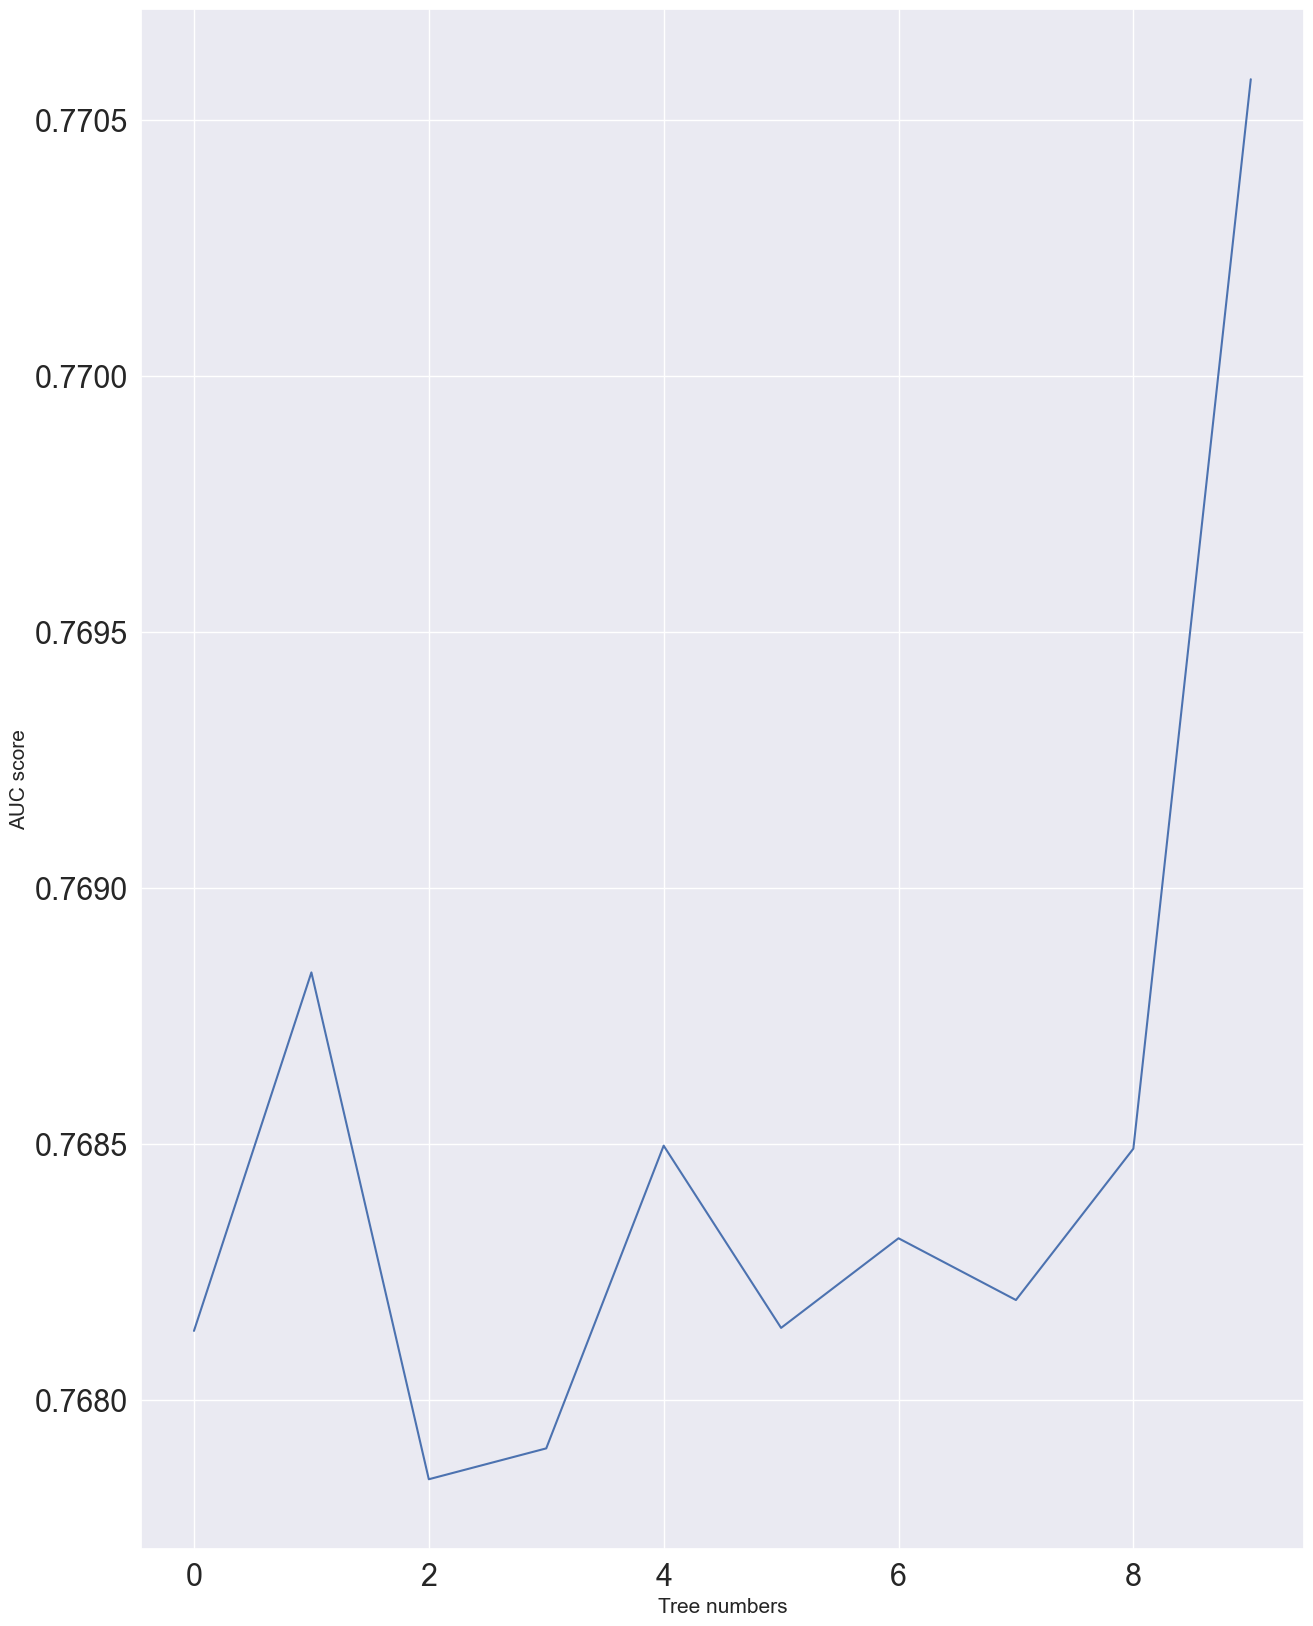

In [152]:

# Plot auc
plt.figure(figsize=(15, 20))
# plt.title('AUC curve of Randomforest with growing tree numbers', fontsize=20)
plt.xlabel('Tree numbers', fontsize=15)
plt.ylabel('AUC score', fontsize=15)
plt.plot(range(len(auc_scores_list)), auc_scores_list)

Do we experience overfitting if we use too many trees?

Yes because we cross validate over and over with our dataset.